In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [2]:
# Importamos los datos
X_train = pd.read_csv("./DatosPisaSinNan/X_train.csv", sep=',', decimal='.')
y_train = pd.read_csv("./DatosPisaSinNan/y_train.csv", sep=',', decimal='.')
X_val = pd.read_csv("./DatosPisaSinNan/X_val.csv", sep=',', decimal='.')
y_val = pd.read_csv("./DatosPisaSinNan/y_val.csv", sep=',', decimal='.')
X_test = pd.read_csv("./DatosPisaSinNan/X_test.csv", sep=',', decimal='.')
y_test = pd.read_csv("./DatosPisaSinNan/y_test.csv", sep=',', decimal='.')

Pasamos los dataframes a numpy array

In [3]:
feature_names = X_train.columns[:]

X_train = X_train.values
y_train = y_train.values



### Estandarización de datos

Escalamos con los datos de train

In [4]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.Normalizer().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XvalScaled = scaler.transform(X_val)
XtestScaled = scaler.transform(X_test)

### Gradient Boosting Regressor

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500, 1000, 5000]
learningRate = [0.1, 0.01]

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=5), param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#Tarda 15 min

best mean cross-validation score: 0.591
best parameters: {'learning_rate': 0.01, 'n_estimators': 1000}


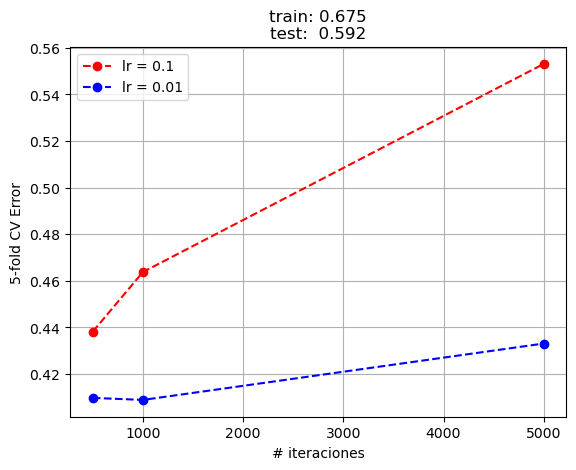

In [6]:
learning_rate = grid.best_params_['learning_rate']
NEstimators = grid.best_params_['n_estimators']

bt = GradientBoostingRegressor(random_state=0, max_depth=5,learning_rate=learning_rate, n_estimators=NEstimators)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

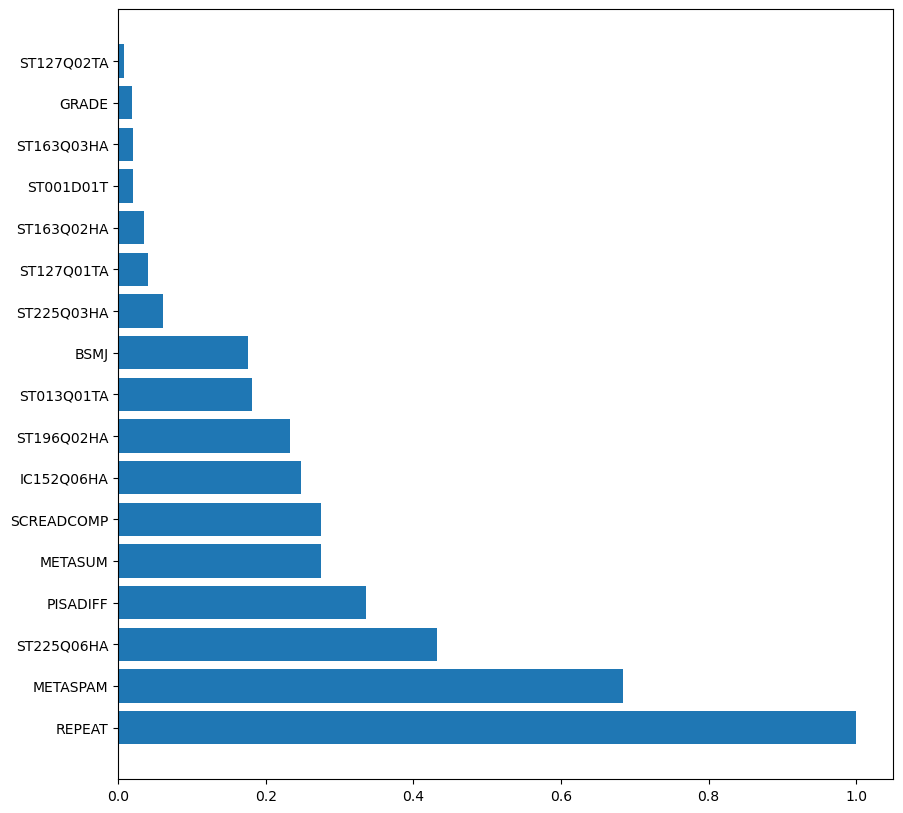

In [7]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


ytrainbt = bt.predict(XtrainScaled)
ytestbt  = bt.predict(XtestScaled)
mseTrainModelbt = mean_squared_error(y_train,ytrainbt)
mseTestModelbt = mean_squared_error(y_test,ytestbt)

print('MSE Modelo GradientBoostingRegressor StandardScaler (train): %0.5g' % mseTrainModelbt)
print('MSE Modelo GradientBoostingRegressor StandardScaler (test) : %0.5g' % mseTestModelbt)

print()

maeTrainModelbt = mean_absolute_error(y_train,ytrainbt)
maeTestModelbt  = mean_absolute_error(y_test,ytestbt)

print('MAE Modelo GradientBoostingRegressor StandardScaler (train): %0.5g' % maeTrainModelbt)
print('MAE Modelo GradientBoostingRegressor StandardScaler (test) : %0.5g' % maeTestModelbt)

MSE Modelo GradientBoostingRegressor StandardScaler (train): 7203.4
MSE Modelo GradientBoostingRegressor StandardScaler (test) : 7419.2

MAE Modelo GradientBoostingRegressor StandardScaler (train): 70.97
MAE Modelo GradientBoostingRegressor StandardScaler (test) : 72.177


In [9]:
# Salvamos el modelo en formato joblib

from joblib import dump, load

dump(bt, 'modeloGradientBoosingRegressor_st.joblib') 

#clf = load('modeloGradientBoosingRegressor_st.joblib') 

['modeloGradientBoosingRegressor_st.joblib']